In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
iris=pd.read_csv("iris.csv")

In [166]:
diseases=pd.read_csv("us_contagious_diseases.csv")

## Question 1 b

In [178]:
def kernel_function(x,x0,tuning_parameter):
    return (1/np.sqrt(2*np.pi)*tuning_parameter)*np.exp((-1/(2*tuning_parameter))*((x-x0)**2))

def estimating_alpha_beta(x0,x,y,tuning_parameter):
    
    beta=(-np.sum(kernel_function(x,x0,tuning_parameter)*y)+np.sum(kernel_function(x,x0,tuning_parameter)*x*y))/((np.sum(kernel_function(x,x0,tuning_parameter)*(x**2))-np.sum(kernel_function(x,x0,tuning_parameter)*x))) #analytical solution of beta
    alpha=(-beta*np.sum(kernel_function(x,x0,tuning_parameter)*x)+np.sum(kernel_function(x,x0,tuning_parameter)*y))/np.sum(kernel_function(x,x0,tuning_parameter)) #analytical solution of alpha
    
    
    return alpha, beta


def local_linear_regression(x,y,tuning_parameter):
    Alphas=[]
    Betas=[]
    for i in range(len(x)):
        a,b = estimating_alpha_beta(x[i],x,y,tuning_parameter)
        Alphas.append(a)
        Betas.append(b)
        
    return Alphas, Betas


## Question 1c

In [168]:
counts_of_measles=[]
for j in range(76):
    for i in range(18870):
        if diseases['disease'][i] =='Measles' and diseases['year'][i] == 1928+j:
            counts_of_measles.append(diseases['count'][i])

In [169]:
total_counts_by_year=[]


for i in range(76):
    Sum=0
    for j in range(51):
        Sum+=counts_of_measles[51*i+j]
    total_counts_by_year.append(Sum)
        


In [170]:
year=[]
for i in range(76):
    year.append(1928+i)

In [171]:
x = np.array(year)
y = np.array(total_counts_by_year)
  
alphas,betas=local_linear_regression(x,y,tuning_parameter=4)

In [172]:
Y_data = []
for i in range(len(alphas)):
    Y_data.append(alphas[i]+betas[i]*year[i])

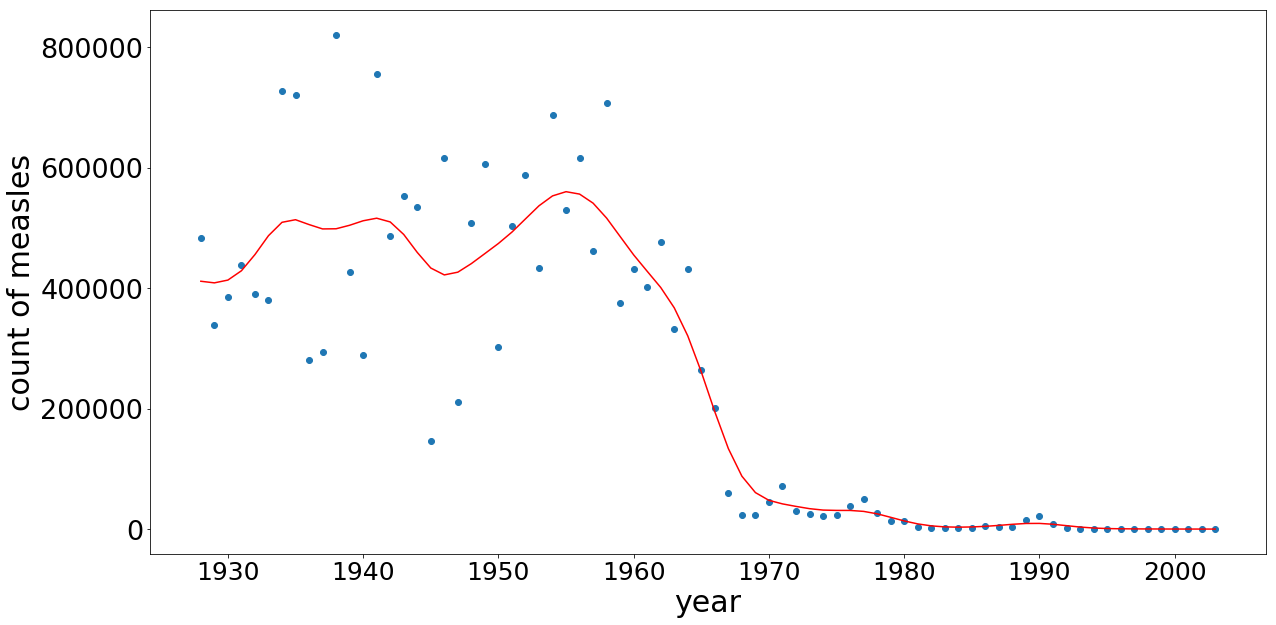

In [173]:
fig=plt.figure(figsize=(20,10))
plt.scatter(year,total_counts_by_year)
plt.xlabel('year', fontsize=30)
plt.ylabel('count of measles', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)

plt.plot(year,Y_data,color='red')
plt.show()

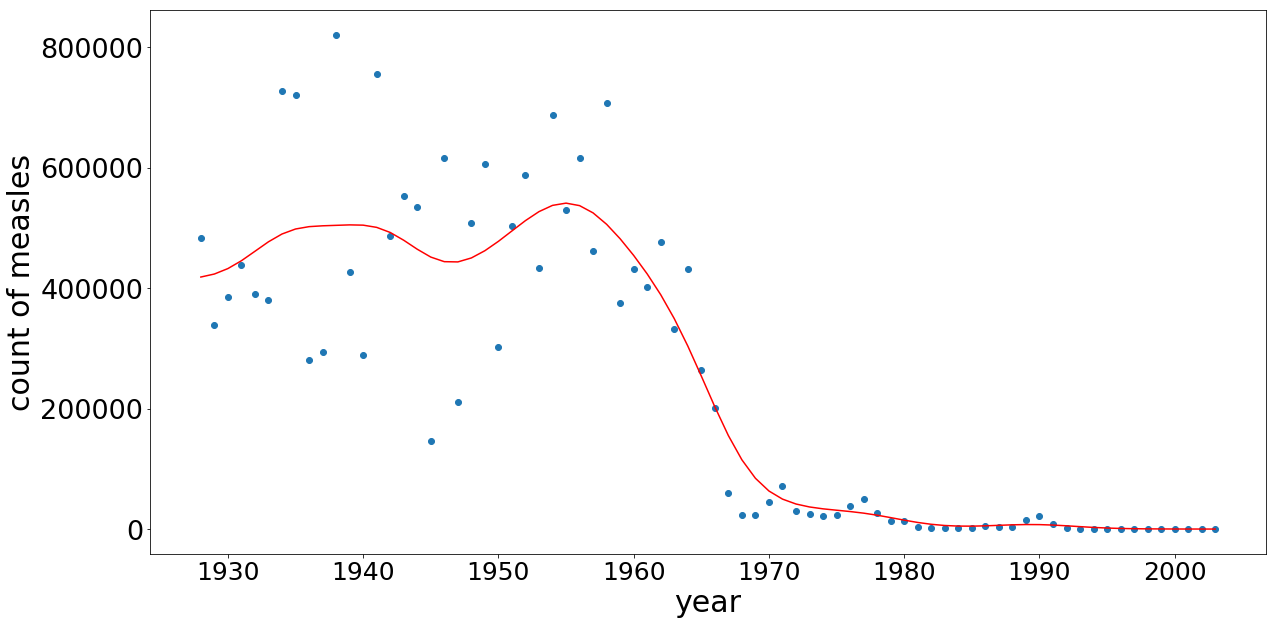

In [174]:
alphas,betas=local_linear_regression(x,y,tuning_parameter=8)
Y_data = []
for i in range(len(alphas)):
    Y_data.append(alphas[i]+betas[i]*year[i])
fig=plt.figure(figsize=(20,10))
plt.scatter(year,total_counts_by_year)
plt.xlabel('year', fontsize=30)
plt.ylabel('count of measles', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)

plt.plot(year,Y_data,color='red')
plt.show()

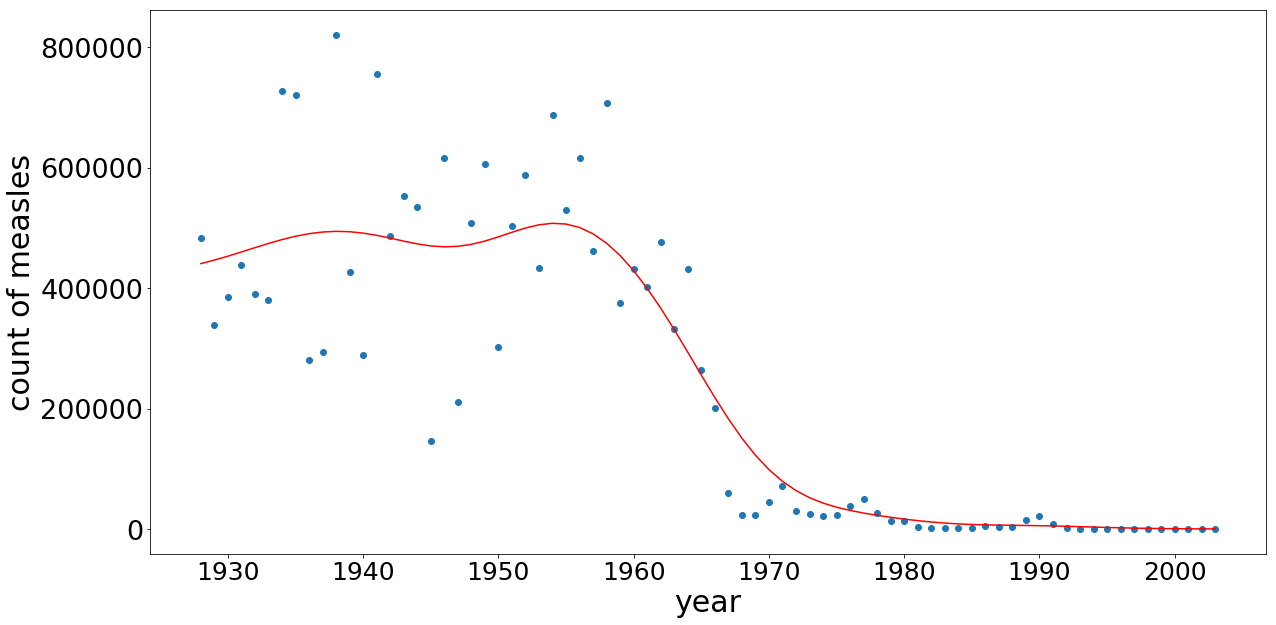

In [175]:
alphas,betas=local_linear_regression(x,y,tuning_parameter=20)
Y_data = []
for i in range(len(alphas)):
    Y_data.append(alphas[i]+betas[i]*year[i])
fig=plt.figure(figsize=(20,10))
plt.scatter(year,total_counts_by_year)
plt.xlabel('year', fontsize=30)
plt.ylabel('count of measles', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)

plt.plot(year,Y_data,color='red')
plt.show()

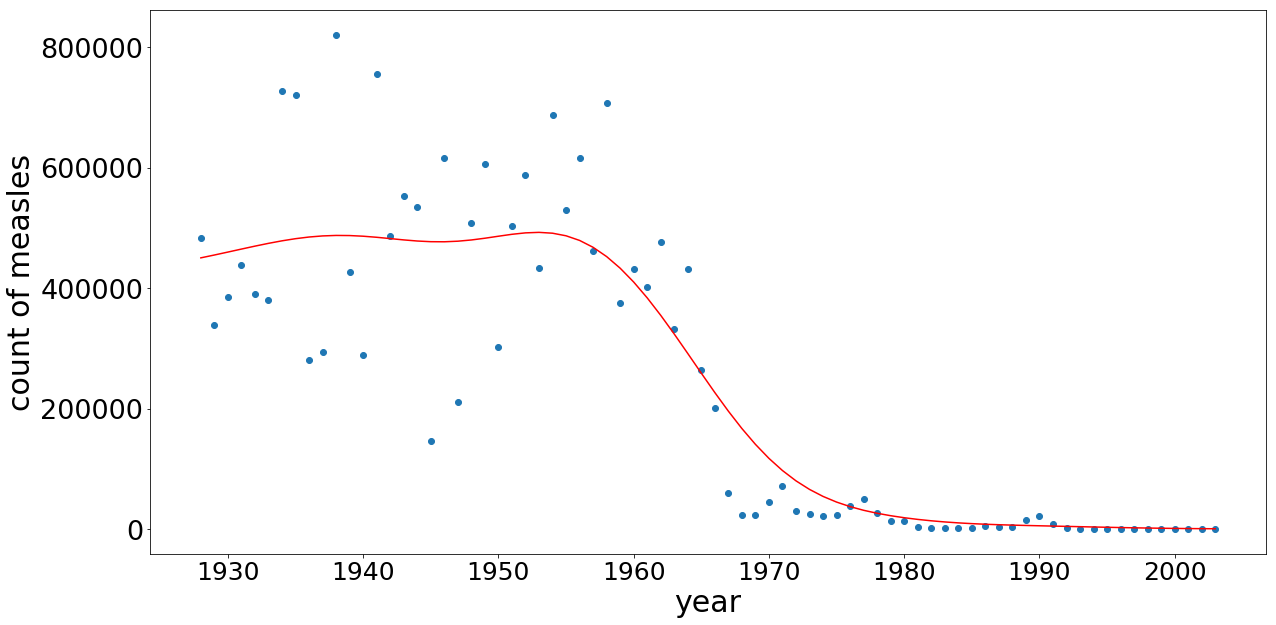

In [176]:
alphas,betas=local_linear_regression(x,y,tuning_parameter=30)
Y_data = []
for i in range(len(alphas)):
    Y_data.append(alphas[i]+betas[i]*year[i])
fig=plt.figure(figsize=(20,10))
plt.scatter(year,total_counts_by_year)
plt.xlabel('year', fontsize=30)
plt.ylabel('count of measles', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)

plt.plot(year,Y_data,color='red')
plt.show()

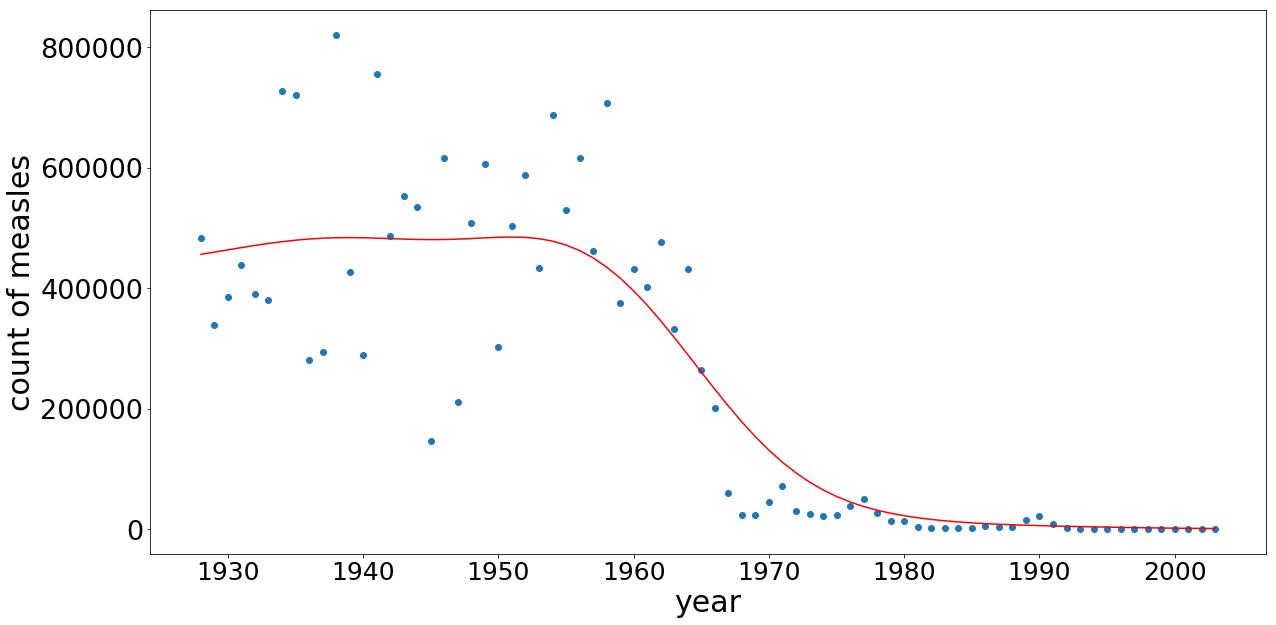

In [179]:
alphas,betas=local_linear_regression(x,y,tuning_parameter=40)
Y_data = []
for i in range(len(alphas)):
    Y_data.append(alphas[i]+betas[i]*year[i])
fig=plt.figure(figsize=(20,10))
plt.scatter(year,total_counts_by_year)
plt.xlabel('year', fontsize=30)
plt.ylabel('count of measles', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)

plt.plot(year,Y_data,color='red')
plt.show()

### Note: I summed up all the counts for each year only because the numbers of observations at different years are the same; so this is a shortcut for this question. But in reality we have to be careful.

## Role of tuning parameter: the larger the tuning parameter, the smoother the curve.

### Question 1 d

## I can conclude that effective policies were implemented around the year of 1967, because since then the count of measles has stayed low.

### question 2b and c

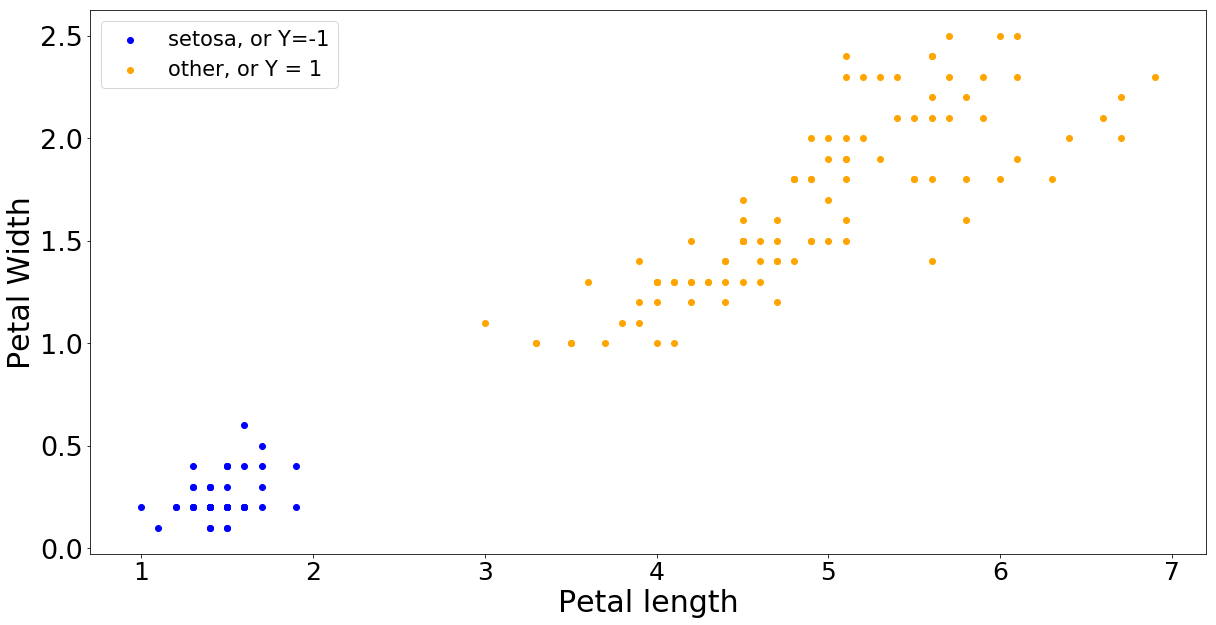

In [11]:
fig=plt.figure(figsize=(20,10))
plt.scatter(iris[iris['Species']=='setosa']['Petal.Length'],iris[iris['Species']=='setosa']['Petal.Width'],color='blue')
plt.scatter(iris[iris['Species']!='setosa']['Petal.Length'],iris[iris['Species']!='setosa']['Petal.Width'],color='orange')
plt.legend(('setosa, or Y=-1', 'other, or Y = 1'), loc='upper left', fontsize=21)
plt.xlabel('Petal length', fontsize=30)
plt.ylabel('Petal Width', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

In [181]:
def perceptron(x, y, initial_theta, alpha=0.01):
    
    x = np.array(x)
    y = np.array(y)
    
    old_theta = np.array([1,1,1])
    predictions = []
    all_thetas = []
    all_thetas.append(initial_theta)
    while np.array_equal(all_thetas[-1]-old_theta,np.array([0,0,0])) == False:
        old_theta = np.copy(all_thetas[-1])
        predictions = []
        theta_new = np.copy(all_thetas[-1])
        for i in range(len(x)):
            if np.dot(np.transpose(all_thetas[-1]),x[i]) >= 0:
                predictions.append(1)
            else:
                predictions.append(-1)
            theta_new = theta_new + alpha*(y[i] - predictions[i])*x[i]
        all_thetas.append(theta_new)
        

    return all_thetas

In [142]:
matrix_x=np.c_[np.ones(iris['Petal.Length'].shape[0]),iris['Petal.Length'],iris['Petal.Width']]
matrix_y=[]
for i in range(50):
    matrix_y.append(-1)
for i in range(100):
    matrix_y.append(1)

In [162]:
all_thetas1 = perceptron(matrix_x,matrix_y,[0,0,0])
print(all_thetas1[-1])

[-3.96   1.082  1.882]


## So decision boundary: X2= -(-3.96)/1.882+(-1.082/1.882)X1 or X2 = (2.1041445)+(-0.5749)*X1

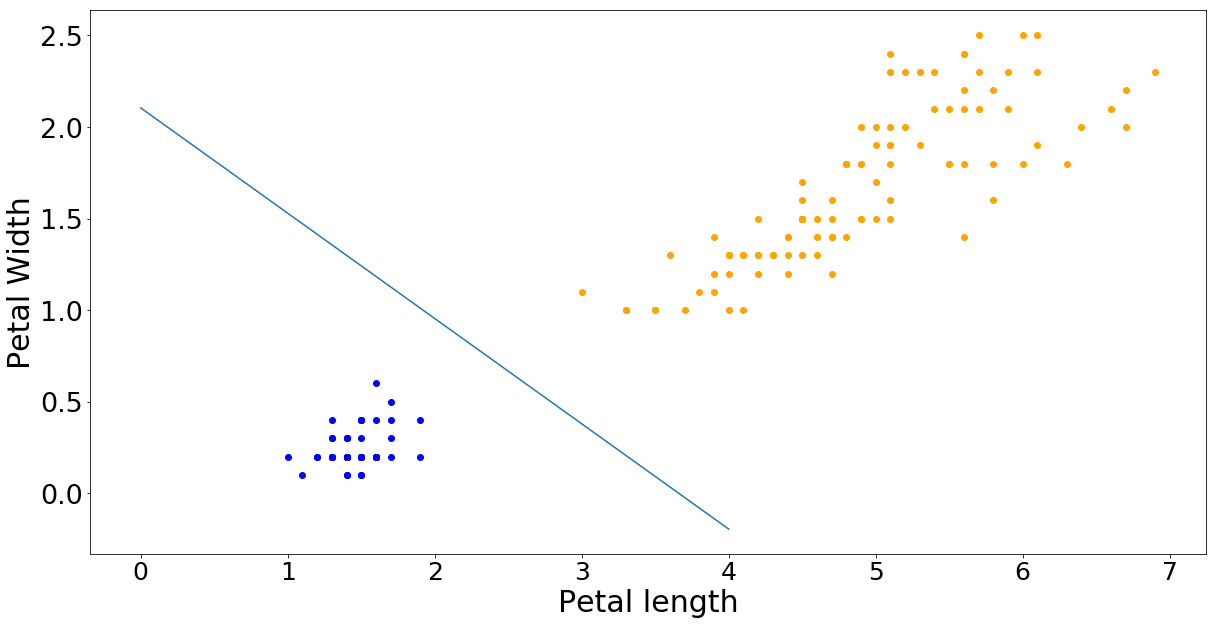

In [163]:
fig=plt.figure(figsize=(20,10))
plt.scatter(iris[iris['Species']=='setosa']['Petal.Length'],iris[iris['Species']=='setosa']['Petal.Width'],color='blue')
plt.scatter(iris[iris['Species']!='setosa']['Petal.Length'],iris[iris['Species']!='setosa']['Petal.Width'],color='orange')
plt.plot(np.arange(0,4,0.000001),(2.1041445)+(-0.5749)*np.arange(0,4,0.000001)) #decision boundary
plt.xlabel('Petal length', fontsize=30)
plt.ylabel('Petal Width', fontsize=30)
plt.yticks(fontsize =27)
plt.xticks(fontsize =25)
plt.show()

## The perceptron has worked well in this case, because the linear decision boundary has clearly seperated the two classes.